<a href="https://colab.research.google.com/github/RinlapasCha/Assignments-Tools/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data

In [281]:
#pip install -U scikit-learn

In [282]:
import pandas as pd
import numpy as np
from numpy import mean,std
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RepeatedKFold, cross_val_score
from sklearn.feature_selection import RFE, SelectKBest, f_regression, mutual_info_classif, f_classif, SelectFromModel, chi2
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [283]:
COLUMN_NAMES = ['pregnancies', 'glucose', 'blood pressure', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'diabetic']
df = pd.read_csv("/content/pima-indians-diabetes.csv", names = COLUMN_NAMES)

In [284]:
# Remove the class variable from the data set
X = df.drop('diabetic', axis=1)
y = df['diabetic']

# Split the data set into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
# get the dataset
def get_dataset():
    X = df.drop('diabetic', axis=1)
    y = df['diabetic']
    return X, y

In [286]:
X

,pregnancies,glucose,blood pressure,skin,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [287]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetic, Length: 768, dtype: int64

# **1. Stat feature selection**

Classification Feature Selection

In [288]:
# ANOVA feature selection for numeric input and categorical output
X,y=  get_dataset()
# define feature selection
fs = SelectKBest(score_func=f_classif, k=8)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(768, 8)


In [289]:
X_selected

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

# **2.Recursive Feature Elimination (RFE)**

RFE for Classification

In [290]:
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
n_scores = cross_val_score(pipeline, X , y , scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.698 (0.054)


In [291]:
print(n_scores)

[0.68831169 0.75324675 0.72727273 0.80519481 0.72727273 0.71428571
 0.71428571 0.72727273 0.61842105 0.59210526 0.61038961 0.58441558
 0.72727273 0.67532468 0.79220779 0.72727273 0.74025974 0.67532468
 0.73684211 0.67105263 0.71428571 0.72727273 0.75324675 0.7012987
 0.67532468 0.63636364 0.7012987  0.72727273 0.64473684 0.64473684]


# **3.Permutation Feature Importance**



permutation feature importance with knn for classification

Feature: 0, Score: -0.00234
Feature: 1, Score: 0.15130
Feature: 2, Score: 0.01536
Feature: 3, Score: 0.01641
Feature: 4, Score: 0.06536
Feature: 5, Score: 0.00547
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.03255


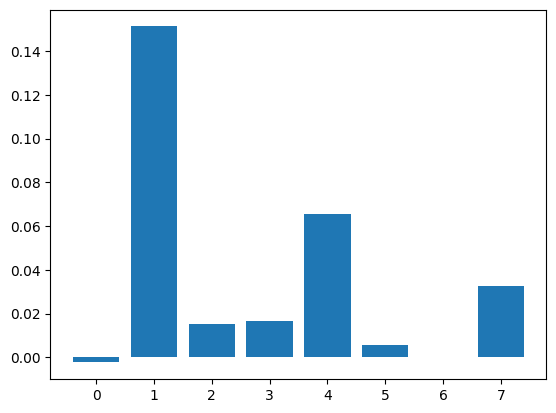

In [292]:
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# **4.Comparison in model development**

Number of features

In [293]:
##Stat feature (Classication)
model_rf = RandomForestClassifier()

# Use RFE with RandomForestClassifier in the pipeline
rfe_rf = RFE(estimator=model_rf, n_features_to_select=5)
pipeline_rf = Pipeline(steps=[('s', rfe_rf), ('m', model_rf)])
scores_rf = cross_val_score(pipeline_rf, X_train, y_train, cv=5, scoring='accuracy')

print(f'Number of features selected by RFE with RandomForest: {rfe_rf.n_features_to_select}')
print(f'Mean Accuracy with RFE and RandomForest: {scores_rf.mean()}')

Number of features selected by RFE with RandomForest: 5
Mean Accuracy with RFE and RandomForest: 0.7557510329201652


In [294]:
##RFE

model_ = DecisionTreeClassifier()
rfe = RFE(estimator=model_, n_features_to_select=5)
pipeline_rfe = Pipeline(steps=[('s', rfe), ('m', model_)])
scores_rfe = cross_val_score(pipeline_rfe, X_train, y_train, cv=5, scoring='accuracy')

print(f'Number of features selected by RFE: {rfe.n_features_to_select}')
print(f'Mean Accuracy with RFE: {scores_rfe.mean()}')

Number of features selected by RFE: 5
Mean Accuracy with RFE: 0.7133546581367453


In [295]:
##Permutation Feature
# Assume X_train, y_train are your training data
model_permutation = RandomForestClassifier(n_estimators=1000)
model_permutation.fit(X_train, y_train)

result_permutation = permutation_importance(model_permutation, X_train, y_train, n_repeats=10, random_state=42)

perm_importance = result_permutation.importances_mean
selected_features_permutation = [index for index, importance in enumerate(perm_importance) if importance > 0]
score_permu = cross_val_score(model_permutation,X_train, y_train, cv=5, scoring='accuracy')
print(f'Number of features selected by Permutation Feature Importance: {len(selected_features_permutation)}')
print(f'Mean Accuracy with Selected by Permutation Feature Importance: {score_permu.mean()}')


Number of features selected by Permutation Feature Importance: 8
Mean Accuracy with Selected by Permutation Feature Importance: 0.7752765560442489


-----
//The cross-validated score
คือการวัดว่าแบบจำลองทำงานได้ดีเพียงใดกับข้อมูล


จากข้อมูลพบว่า พบว่า Permutation Feature Importance เป็นวิธีดีที่สุดในบรรดาสามวิธีเมื่อเปรียบเทียบ โดยใช้ Number of features

----


Selected features

In [183]:
# evaluation of a model using all features

X, y = get_dataset()
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 75.97


In [208]:
# evaluation of a model using 5 features chosen with Stat feature selection

X, y = get_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest with chi-squared test
k_best = SelectKBest(score_func=chi2, k=5)
X_train_fs = k_best.fit_transform(X_train, y_train)
X_test_fs = k_best.transform(X_test)

# Fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# Evaluate the model
yhat = model.predict(X_test_fs)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 75.97%


In [206]:
#evaluation of a model using 5 features chosen with REF

X, y = get_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Feature selection using RFE
fs = RFE(estimator=RandomForestClassifier(n_estimators=1000), n_features_to_select=5)
X_train_fs = fs.fit_transform(X_train, y_train)
X_test_fs = fs.transform(X_test)

# Fit the Logistic Regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)

# Evaluate the model
yhat = model.predict(X_test_fs)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 77.56%


In [207]:
#evaluation of a model using 8 features chosen with Permutation Feature Importance

X, y = get_dataset()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier to get initial feature importance
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate permutation feature importance
perm_importance = permutation_importance(rf_model, X_train, y_train, n_repeats=10, random_state=42)

# Get indices of top 8 features based on permutation importance
top_features_indices = (-perm_importance.importances_mean).argsort()[:8]

# Select the top 8 features
X_train_perm_importance = X_train.iloc[:, top_features_indices]
X_test_perm_importance = X_test.iloc[:, top_features_indices]

# Fit the Logistic Regression model on selected features
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train_perm_importance, y_train)

# Evaluate the model
yhat = lr_model.predict(X_test_perm_importance)

# Evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 75.97%


จากการ Result พบว่า model using 5 features chosen with REF ให้ประสิทธิภาพอยู่ที่ Accuracy: 77.27% ซึ่งสูงที่สุดจากท้ั้งหมด 3 วิธี

Feature Ranking

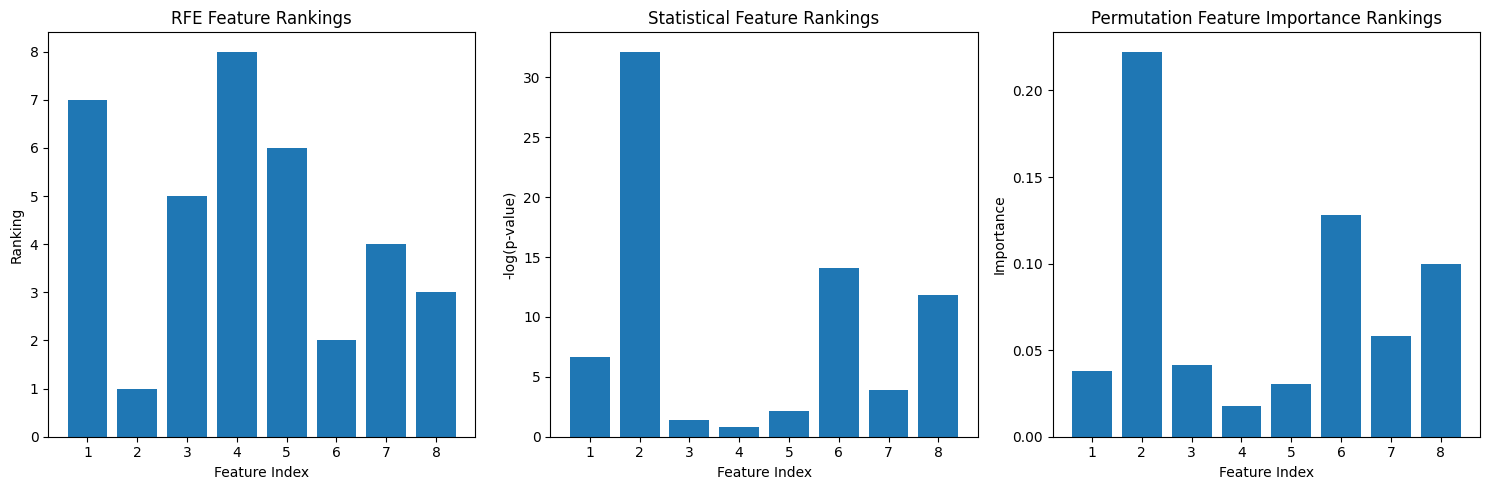

In [204]:
# Define a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Function to get feature rankings from RFE
def get_rfe_feature_rankings(X, y, clf):
    rfe = RFE(clf, n_features_to_select=1)
    rfe.fit(X, y)
    rankings = rfe.ranking_
    return rankings

# Function to get feature rankings from Statistical feature selection
def get_stat_feature_rankings(X, y):
    skb = SelectKBest(f_classif, k='all')
    skb.fit(X, y)
    rankings = -np.log10(skb.pvalues_)
    return rankings

# Function to get feature rankings from Permutation Feature Importance
def get_permutation_feature_rankings(X, y, clf):
    result = permutation_importance(clf, X, y, n_repeats=5, random_state=42)
    rankings = result.importances_mean
    return rankings

# Get feature rankings for each method
rfe_rankings = get_rfe_feature_rankings(X_train, y_train, clf)
stat_rankings = get_stat_feature_rankings(X_train, y_train)
perm_rankings = get_permutation_feature_rankings(X_train, y_train, clf)

# Plot feature rankings
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(range(1, len(rfe_rankings) + 1), rfe_rankings)
plt.title('RFE Feature Rankings')
plt.xlabel('Feature Index')
plt.ylabel('Ranking')

plt.subplot(1, 3, 2)
plt.bar(range(1, len(stat_rankings) + 1), stat_rankings)
plt.title('Statistical Feature Rankings')
plt.xlabel('Feature Index')
plt.ylabel('-log(p-value)')

plt.subplot(1, 3, 3)
plt.bar(range(1, len(perm_rankings) + 1), perm_rankings)
plt.title('Permutation Feature Importance Rankings')
plt.xlabel('Feature Index')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()



1.   Feature Index: This column shows the index of the features used in the model. The index ranges from 0 to 40.
2.   RFE Feature Rankings: This column shows the ranking of the features based on the Recursive Feature Elimination (RFE) method. The ranking ranges from 0 to 20.0, with lower values indicating more important features.
3.  Statistical Feature Rankings: This column shows the ranking of the features based on statistical measures. The ranking ranges from 0.0 to 20.0, with lower values indicating more important features.
4. Permutation Feature Importance Rankings: This column shows the ranking of the features based on permutation feature importance. The ranking ranges from 0.0 to 20.0, with lower values indicating more important features.



---
โดยรวมแล้ว feature index 2,3,6,7 และ 8 ของวิธี REF เหมาะสม

โดยรวมแล้ว feature index 1,3,4,5 และ 7 ของวิธี Stat feature selection เหมาะสม

โดยรวมแล้ว feature index 2 เพียงอันเดียวที่ไม่เหมาะส



